<a href="https://colab.research.google.com/github/leticia16/digital-image-processing/blob/main/histogramMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Source


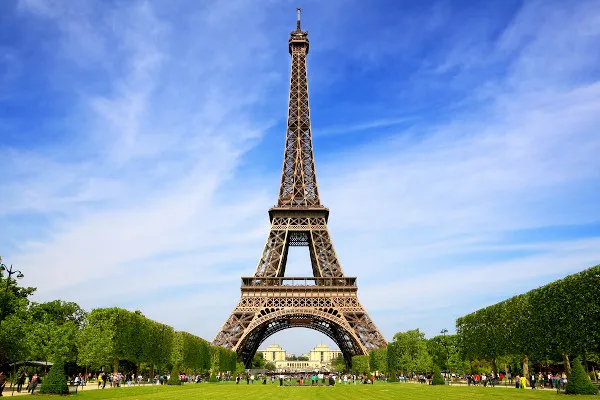

Reference


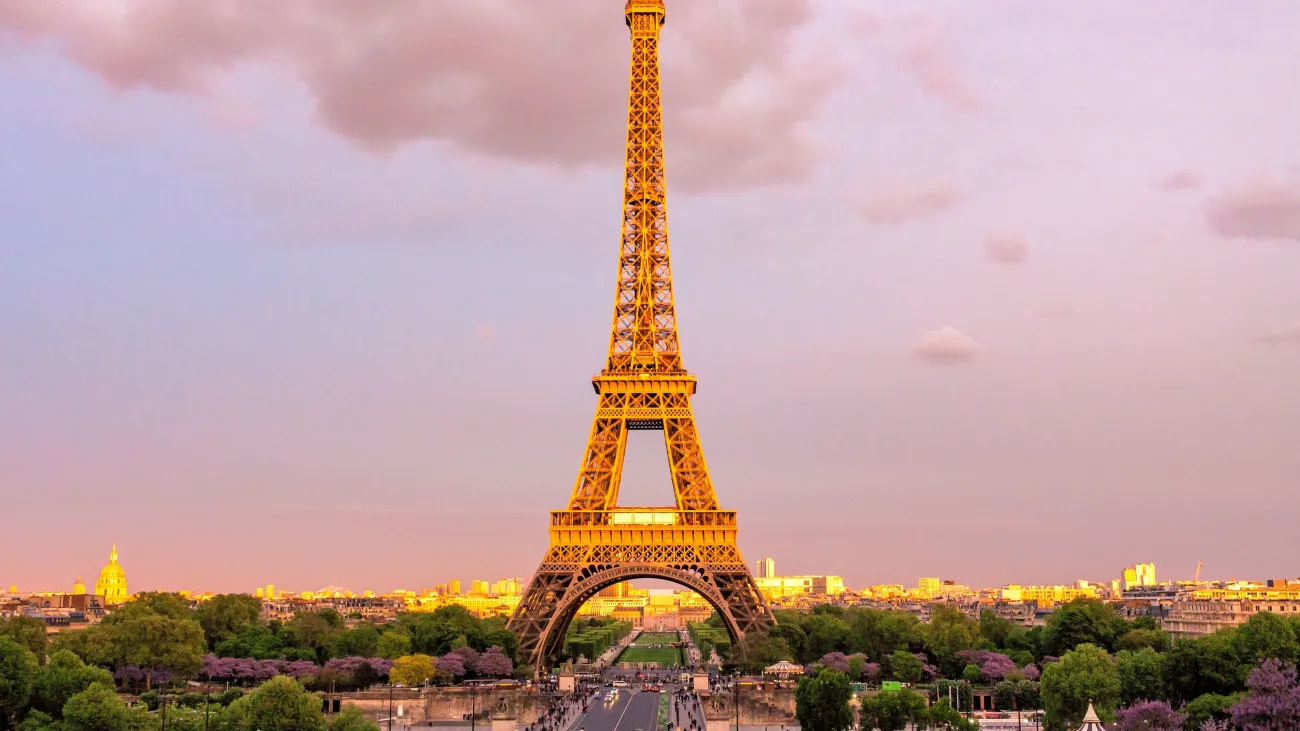

Matched


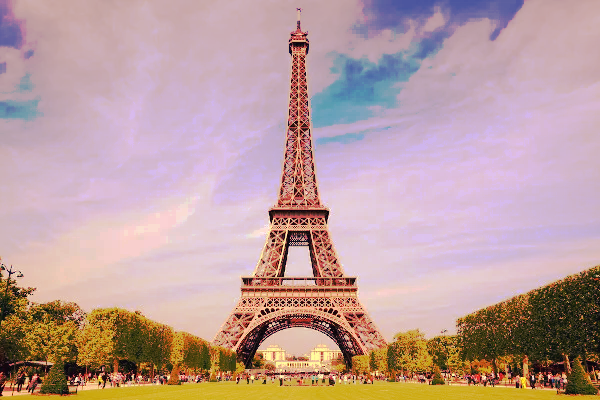

In [119]:
src = cv2.imread("eiffel.webp", cv2.IMREAD_UNCHANGED)
ref = cv2.imread("other.webp", cv2.IMREAD_UNCHANGED)

matched = exposure.match_histograms(src, ref, channel_axis=-1)
print("Source")
cv2_imshow(src)
print("Reference")
cv2_imshow(ref)
print("Matched")
cv2_imshow(matched)

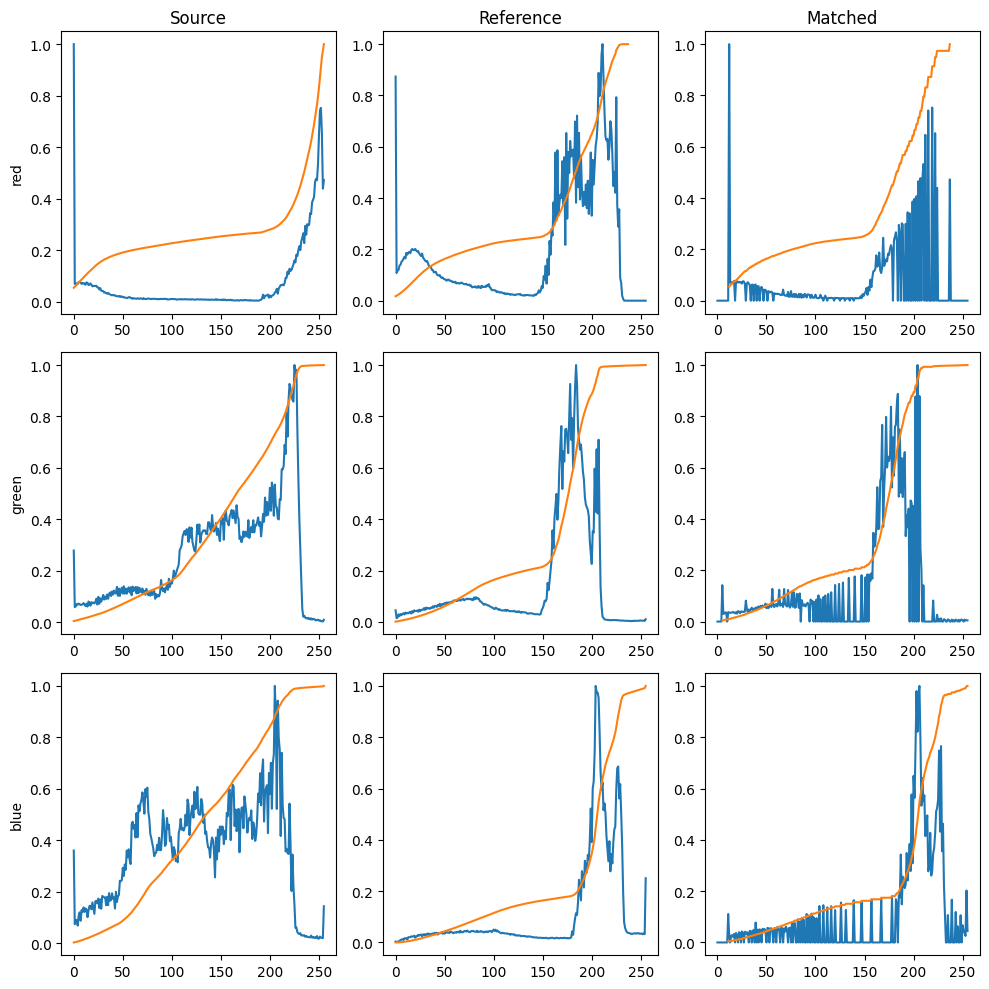

In [95]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))


for i, img in enumerate((src, ref, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()